# 1. Problem Definition

    * Goal : Predict Housing price based on feature like no of  rooms,Income,location
    * Purpose : Estimate House Price,understand the domain Context
    * Define Success criteria- Accuracy,cost saving,Revenue
    * Hypothesis  -> predict the result
    * Translate the business need into a datascience problem (classification,Regression,Clustering)
   

# 2. Data Collection

        * Source : Used Public dataset (Housing)
        * Process : stored in pandas for analysis
        * Purpose : High quality and relevent data ensures reliable insights
     

In [ ]:
import pandas as pd
import numpy as np
#using heatmap for finding correlation between variables and sale
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [ ]:
#Load the data
df=pd.read_csv('Housing.csv')
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Unnamed: 13,Unnamed: 14
0,8645000,4560.0,3,2,2,yes,yes,yes,no,yes,1,no,fully furnished,NaN,545.0
1,8043000,7482.0,3,2,3,yes,no,no,yes,no,1,yes,fully furnished,NaN,NaN
2,7000000,11175.0,3,1,1,yes,no,yes,no,yes,1,yes,fully furnished,NaN,NaN
3,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished,NaN,NaN
4,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished,NaN,NaN


# 3. DataCleaning
    * Handling Missing values
    * in this dataset we can see null values in area so we can remove by meadian
    

In [ ]:
#checking null values

print('shape',df.shape)
print('\n missing values per column')
print(df.isnull().sum())
print('\n Dulicated rows',df.duplicated().sum())
print('\n Datatypes')
print(df.dtypes)


shape (545, 15)

 missing values per column
price                 0
area                  4
bedrooms              0
bathrooms             0
stories               0
mainroad              0
guestroom             0
basement              0
hotwaterheating       0
airconditioning       0
parking               0
prefarea              0
furnishingstatus      0
Unnamed: 13         545
Unnamed: 14         544
dtype: int64

 Dulicated rows 0

 Datatypes
price                 int64
area                float64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking               int64
prefarea             object
furnishingstatus     object
Unnamed: 13         float64
Unnamed: 14         float64
dtype: object


In [ ]:
# Drop useless columns
df = df.drop(columns=["Unnamed: 13", "Unnamed: 14"])

# Fill missing values (area → median)
df["area"] = df["area"].fillna(df["area"].median())


# 4.EDA (Exploratory Data Analysis)

* Summary Statics(Mean.Median,Mode)
* Correlation between features and target
* Visualization :Histogram,Boxplot,Scatterplot
* Visualize distribution and correlation



In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB
None


In [ ]:
#summary statitics
print(df.describe())



              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5144.247706    2.965138    1.350459    1.842202   
std    1.870440e+06   2167.781796    0.738064    0.813560    1.047080   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4560.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    8.000000   12.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


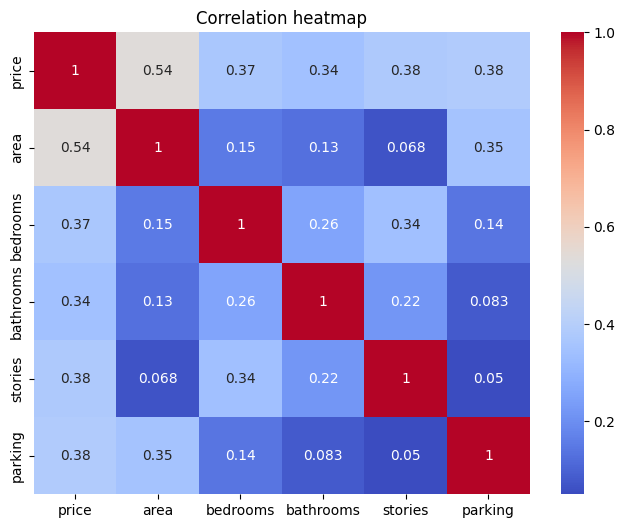

In [ ]:
plt.figure(figsize=(8,6))
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

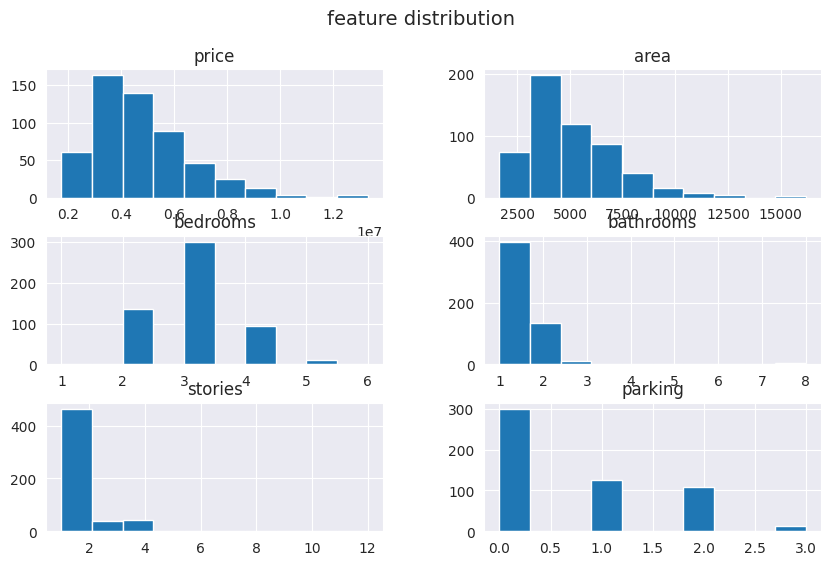

In [ ]:
# use seaborn styling
sns.set_style('darkgrid')

#plot histogram
df.hist(figsize=(10,6),bins=10)
plt.suptitle('feature distribution',fontsize=14)
plt.show()

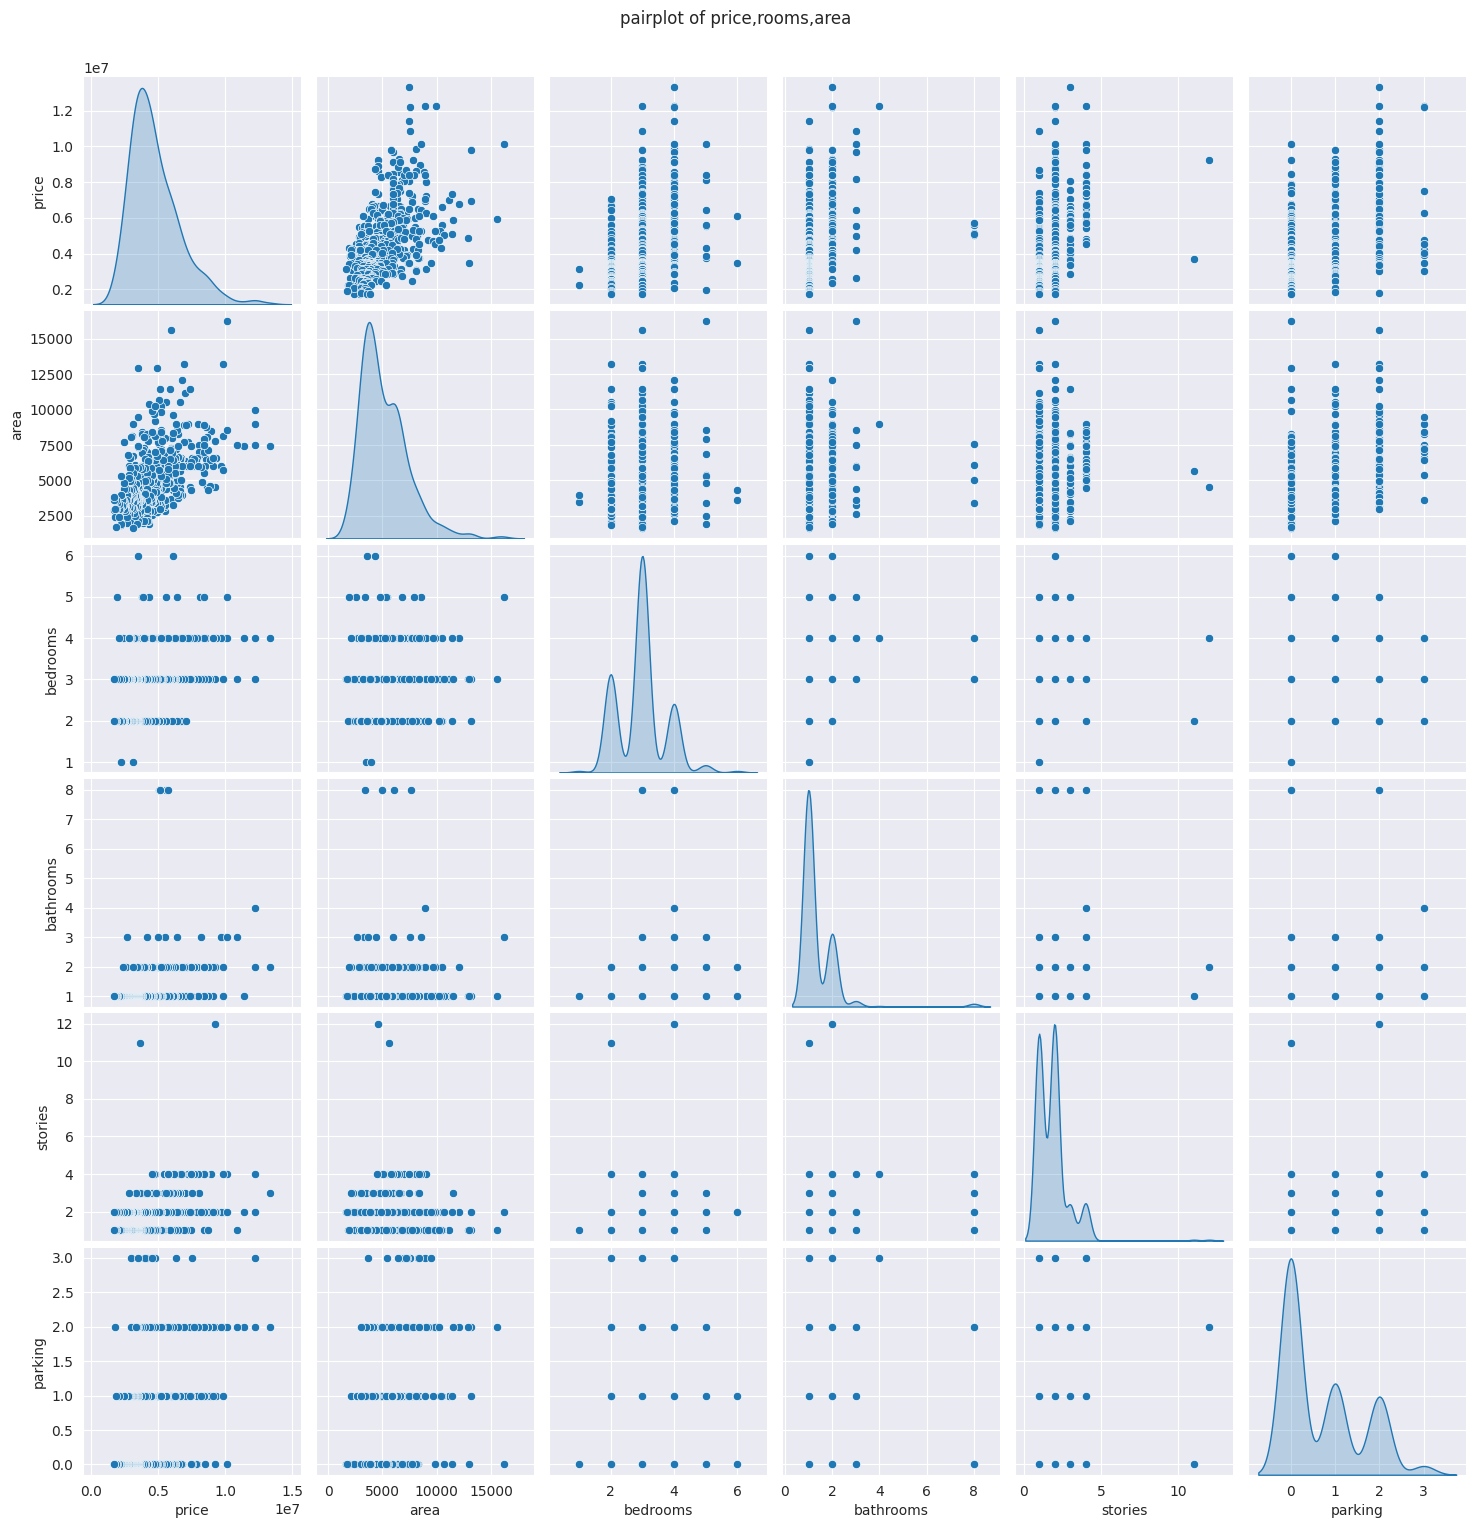

In [ ]:
#pairplot to visualize relationship
sns.pairplot(df,diag_kind='kde',corner=False)
plt.suptitle('pairplot of price,rooms,area ',y=1.02)
plt.show()


# 5. Feature Engineering

    * Create new features (Rooms per household = AveRooms/household)
    * Encode Categorical data if present(mainroad,guestroom..)
    * Scale/normalize features for Linear regression

In [ ]:

X = df.drop(columns=['price'])
y = df['price']

categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ]
)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. ModelBuilding

    * using Train Machine Learning model(Ex.Linear        
      Regression,Random Forest Regression
    * Decision Trees,Random Forest


In [ ]:

models = {
    "Linear Regression":LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=200),

}
#Train-Test-Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



# 7. Model Evaluation

  * Metrics : for checking Accuracy,Precision Recall,f1,ROC-AUC
  * Regression Metrics : MAE,RMSE,R²


In [ ]:
#7.Training and evalution
results = {}
trained_models = {}

for name, model in models.items():
    # Build pipeline
    pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                               ("model", model)])

    # Train
    pipeline.fit(X_train, y_train)

    # Save trained pipeline
    trained_models[name] = pipeline

    # Predict
    y_pred = pipeline.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}


# 7. Display Results

results_df = pd.DataFrame(results).T
print("\n Model Comparison:\n")
print(results_df)



 Model Comparison:

                            MAE          RMSE        R2
Linear Regression  9.289726e+05  1.316179e+06  0.575363
Random Forest      1.056175e+06  1.546638e+06  0.413639
